### Simulating Expectation Values

In [3]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import Pauli, Statevector
from qiskit.primitives import Estimator
from qiskit_aer import StatevectorSimulator
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.visualization import circuit_drawer
import numpy as np

In [2]:
"First, we need to define our parameterized state using RealAmplitude circuit with 2 Qbits"
ansatz =RealAmplitudes(num_qubits = 2, reps = 1, entanglement = 'linear', insert_barriers = True).decompose()

"""Next we need to define a Hamiltonian: This is the operator that describes the system (in the energy basis).
let's use: H = Z tensor Z.
"""

Z = Pauli('Z')
hamiltonian = Z ^ Z

# randomly defining circuit parameters
parameters = np.random.rand(ansatz.num_parameters)

def Expectation_Value(parameter_values):
    estimator = Estimator()
    expectation_value = estimator.run(ansatz, hamiltonian, parameter_values).result().values
    return expectation_value

'Print state Vector'
def State():
    simulator = StatevectorSimulator()
    result = simulator.run(ansatz).result()
    statevector = result.get_statevector(ansatz)
    statevector.draw('latex')

Expectation_Value(parameters)

array([0.9519607])

##### Let's have a more simplified circut

Expectation value [1.]


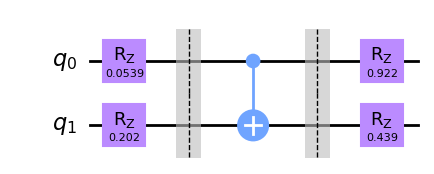

In [6]:
parameters = ParameterVector(r'$\theta$', length = 4)
qc = QuantumCircuit(2)
qc.rz(parameters[0], 0)
qc.rz(parameters[1], 1)
qc.barrier()

qc.cx(0, 1)
qc.barrier()

qc.rz(parameters[2], 0)
qc.rz(parameters[3], 1)

thetas = np.random.rand(len(parameters))
qc = qc.bind_parameters(dict(zip(qc.parameters, thetas)))   # assigning values to parameters


Z = Pauli('Z')
hamiltonian = Z ^ Z

estimator = Estimator()
expectation_value = estimator.run(qc, hamiltonian).result().values
print(f'Expectation value',expectation_value)

qc.draw(output = 'mpl')